In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
path = 'medical-appointments-no-show-en.csv'
dt = pd.read_csv(path)
dt.head()

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,...,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09/09/2021,yes,surto,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09/09/2021,no,NaN,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09/09/2021,no,NaN,motor,10/10/1954,5/2/2020,B. CAMBORIU,...,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild


In [5]:
dt.isna().mean()

specialty                  0.150303
appointment_time           0.000000
gender                     0.000000
appointment_date           0.000000
no_show                    0.000000
no_show_reason             0.964975
disability                 0.103583
date_of_birth              0.208114
entry_service_date         0.103946
city                       0.104470
icd                        0.783901
appointment_month          0.000000
appointment_year           0.000000
appointment_shift          0.000000
age                        0.208699
under_12_years_old         0.000000
over_60_years_old          0.000000
patient_needs_companion    0.000000
average_temp_day           0.020487
average_rain_day           0.020487
max_temp_day               0.020487
max_rain_day               0.020487
rainy_day_before           0.000000
storm_day_before           0.000000
rain_intensity             0.000000
heat_intensity             0.000000
dtype: float64

In [6]:
noshowdt = dt[dt['no_show'] == 'yes']
yesshowdt = dt[dt['no_show'] == 'no']

In [7]:
print(noshowdt['age'].mean(),noshowdt['age'].std())
print(yesshowdt['age'].mean(),yesshowdt['age'].std())
# no significant difference

19.424441900400687 20.45012753488039
18.43419396346751 19.11011070140335


In [8]:
print(noshowdt['gender'].value_counts(normalize=True)['M'])
print(yesshowdt['gender'].value_counts(normalize=True)['M'])
# no significant difference

0.7433774834437086
0.7593887536024664


In [9]:
print(noshowdt['specialty'].value_counts(normalize=True))
print(yesshowdt['specialty'].value_counts(normalize=True))
# no significant difference

specialty
speech therapy          0.285169
psychotherapy           0.277538
physiotherapy           0.239379
occupational therapy    0.141185
pedagogo                0.039176
enf                     0.010939
sem especialidade       0.003307
assist                  0.003307
Name: proportion, dtype: float64
specialty
speech therapy          0.281512
psychotherapy           0.277010
physiotherapy           0.212861
occupational therapy    0.155229
pedagogo                0.049990
enf                     0.017509
assist                  0.004737
sem especialidade       0.001152
Name: proportion, dtype: float64


In [38]:
print(noshowdt['average_temp_day'].mean())
print(yesshowdt['average_temp_day'].mean())

19.943690527218177
19.72755664867573


In [39]:
print(noshowdt['average_rain_day'].mean())
print(yesshowdt['average_rain_day'].mean())

0.21857908272610374
0.18709503313520529


In [40]:
print(noshowdt['max_temp_day'].mean())
print(yesshowdt['max_temp_day'].mean())
print()
print(noshowdt['max_rain_day'].mean())
print(yesshowdt['max_rain_day'].mean())

23.998028289755677
23.958153993304638

2.0993999142734676
1.8740406731798411


In [43]:
print(dt['rain_intensity'].value_counts(normalize=True))

rain_intensity
no_rain     0.713044
moderate    0.140846
weak        0.096828
heavy       0.049281
Name: proportion, dtype: float64


In [42]:
print(noshowdt['rain_intensity'].value_counts(normalize=True))
print(yesshowdt['rain_intensity'].value_counts(normalize=True))

rain_intensity
no_rain     0.699503
moderate    0.149627
weak        0.097889
heavy       0.052980
Name: proportion, dtype: float64
rain_intensity
no_rain     0.714506
moderate    0.139899
weak        0.096714
heavy       0.048882
Name: proportion, dtype: float64


In [ ]:
print(noshowdt['heat_intensity'].value_counts(normalize=True))
print(yesshowdt['heat_intensity'].value_counts(normalize=True))
# BIG DIFFERENCE

heat_intensity
mild          0.409354
cold          0.308775
warm          0.225786
heavy_cold    0.044081
heavy_warm    0.012003
Name: proportion, dtype: float64
heat_intensity
mild          0.478877
cold          0.285986
warm          0.196577
heavy_cold    0.028440
heavy_warm    0.010120
Name: proportion, dtype: float64


In [46]:
print(dt[dt['heat_intensity'] == 'mild']['no_show'].value_counts(normalize=True))
print(dt[dt['heat_intensity'] == 'cold']['no_show'].value_counts(normalize=True))
print(dt[dt['heat_intensity'] == 'warm']['no_show'].value_counts(normalize=True))
print(dt[dt['heat_intensity'] == 'heavy_cold']['no_show'].value_counts(normalize=True))
print(dt[dt['heat_intensity'] == 'heavy_warm']['no_show'].value_counts(normalize=True))

no_show
no     0.915517
yes    0.084483
Name: proportion, dtype: float64
no_show
no     0.895613
yes    0.104387
Name: proportion, dtype: float64
no_show
no     0.889687
yes    0.110313
Name: proportion, dtype: float64
no_show
no     0.856662
yes    0.143338
Name: proportion, dtype: float64
no_show
no     0.886497
yes    0.113503
Name: proportion, dtype: float64


In [ ]:
print(noshowdt['appointment_time'].value_counts(normalize=True))
print(yesshowdt['appointment_time'].value_counts(normalize=True))
# change this

appointment_time
14:40    0.081747
14:00    0.054636
16:20    0.051325
13:20    0.044909
15:20    0.043874
           ...   
11:30    0.000207
16:40    0.000207
12:10    0.000207
17:36    0.000207
15:15    0.000207
Name: proportion, Length: 62, dtype: float64
appointment_time
14:40    0.083443
09:10    0.062599
13:50    0.053797
15:30    0.050111
08:20    0.047318
           ...   
08:10    0.000022
13:05    0.000022
16:36    0.000022
16:50    0.000022
09:03    0.000022
Name: proportion, Length: 72, dtype: float64


In [11]:
print(noshowdt['appointment_date'].value_counts(normalize=True))
print(yesshowdt['appointment_date'].value_counts(normalize=True))

appointment_date
13/04/2018    0.012417
29/05/2017    0.010555
25/06/2021    0.009106
24/06/2021    0.008899
17/04/2017    0.007450
                ...   
04/04/2018    0.000207
04/04/2019    0.000207
02/05/2018    0.000207
02/05/2017    0.000207
23/08/2018    0.000207
Name: proportion, Length: 823, dtype: float64
appointment_date
17/04/2017    0.005161
15/03/2017    0.004178
12/04/2017    0.003508
22/07/2016    0.003195
30/10/2018    0.003150
                ...   
28/11/2017    0.000067
08/12/2017    0.000022
18/09/2016    0.000022
17/09/2016    0.000022
04/06/2021    0.000022
Name: proportion, Length: 988, dtype: float64


In [19]:
print(noshowdt['disability'].value_counts(normalize=False))

disability
intellectual    2742
motor           1308
                   4
Name: count, dtype: int64


In [18]:
print(yesshowdt['disability'].value_counts(normalize=False))

disability
intellectual    28140
motor           12257
                    5
Name: count, dtype: int64


In [17]:
yesshowdt.isna().mean()

specialty                  0.146400
appointment_time           0.000000
gender                     0.000000
appointment_date           0.000000
no_show                    0.000000
no_show_reason             0.998660
disability                 0.097384
date_of_birth              0.200844
entry_service_date         0.097674
city                       0.098233
icd                        0.791560
appointment_month          0.000000
appointment_year           0.000000
appointment_shift          0.000000
age                        0.201336
under_12_years_old         0.000000
over_60_years_old          0.000000
patient_needs_companion    0.000000
average_temp_day           0.018990
average_rain_day           0.018990
max_temp_day               0.018990
max_rain_day               0.018990
rainy_day_before           0.000000
storm_day_before           0.000000
rain_intensity             0.000000
heat_intensity             0.000000
dtype: float64

In [ ]:
print(noshowdt['city'].value_counts(normalize=True))
print(yesshowdt['city'].value_counts(normalize=True))
# nothing stands out

city
ITAJAÍ            0.449852
B. CAMBORIU       0.136611
CAMBORIU          0.101532
NAVEGANTES        0.101285
ITAPEMA           0.063735
BOMBINHAS         0.049407
PORTO BELO        0.027421
ILHOTA            0.019022
LUIZ ALVES        0.017540
PENHA             0.015810
BALN. PIÇARRAS    0.015563
MONTENEGRO        0.001482
BLUMENAU          0.000741
Name: proportion, dtype: float64
city
ITAJAÍ            0.463135
B. CAMBORIU       0.135393
CAMBORIU          0.126648
NAVEGANTES        0.086488
ITAPEMA           0.059632
BOMBINHAS         0.037335
PENHA             0.024155
BALN. PIÇARRAS    0.021851
PORTO BELO        0.020786
ILHOTA            0.012536
LUIZ ALVES        0.011198
MONTENEGRO        0.000520
BLUMENAU          0.000322
Name: proportion, dtype: float64


In [22]:
print(noshowdt['appointment_month'].value_counts(normalize=True))
print(yesshowdt['appointment_month'].value_counts(normalize=True))

appointment_month
june     0.136382
oct      0.111755
feb      0.098303
aug      0.090439
april    0.088162
sept     0.085265
may      0.082781
nov      0.081747
mar      0.074917
july     0.074296
dec      0.042632
jan      0.033320
Name: proportion, dtype: float64
appointment_month
oct      0.128281
aug      0.124751
july     0.105739
june     0.096959
sept     0.095172
mar      0.080852
nov      0.079020
april    0.078819
may      0.073948
feb      0.073099
dec      0.038002
jan      0.025357
Name: proportion, dtype: float64


In [28]:
dt['no_show'].value_counts(normalize=True)

no_show
no     0.902567
yes    0.097433
Name: proportion, dtype: float64

In [32]:
dt['appointment_month'].value_counts(normalize=True)

appointment_month
oct      0.126671
aug      0.121408
july     0.102676
june     0.100801
sept     0.094207
mar      0.080273
april    0.079729
nov      0.079285
feb      0.075555
may      0.074809
dec      0.038453
jan      0.026133
Name: proportion, dtype: float64

In [33]:
dt['appointment_year'].value_counts(normalize=True)

appointment_year
2017    0.253342
2018    0.193697
2021    0.181639
2019    0.173089
2016    0.161011
2022    0.018995
2020    0.018228
Name: proportion, dtype: float64

In [ ]:
print(dt[dt['appointment_year'] == 2016]['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_year'] == 2017]['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_year'] == 2018]['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_year'] == 2019]['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_year'] == 2020]['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_year'] == 2021]['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_year'] == 2022]['no_show'].value_counts(normalize=True))
# post covid years are lower


no_show
no     0.96005
yes    0.03995
Name: proportion, dtype: float64
no_show
no     0.917383
yes    0.082617
Name: proportion, dtype: float64
no_show
no     0.919842
yes    0.080158
Name: proportion, dtype: float64
no_show
no     0.87698
yes    0.12302
Name: proportion, dtype: float64
no_show
no     0.860619
yes    0.139381
Name: proportion, dtype: float64
no_show
no     0.848912
yes    0.151088
Name: proportion, dtype: float64
no_show
no     0.828025
yes    0.171975
Name: proportion, dtype: float64


In [30]:
print(dt[dt['appointment_month'] == 'jan']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'feb']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'mar']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'april']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'may']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'june']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'july']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'aug']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'sept']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'oct']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'nov']['no_show'].value_counts(normalize=True))
print(dt[dt['appointment_month'] == 'dec']['no_show'].value_counts(normalize=True))

no_show
no     0.875772
yes    0.124228
Name: proportion, dtype: float64
no_show
no     0.873232
yes    0.126768
Name: proportion, dtype: float64
no_show
no     0.909068
yes    0.090932
Name: proportion, dtype: float64
no_show
no     0.892261
yes    0.107739
Name: proportion, dtype: float64
no_show
no     0.892183
yes    0.107817
Name: proportion, dtype: float64
no_show
no     0.868174
yes    0.131826
Name: proportion, dtype: float64
no_show
no     0.929497
yes    0.070503
Name: proportion, dtype: float64
no_show
no     0.927421
yes    0.072579
Name: proportion, dtype: float64
no_show
no     0.911815
yes    0.088185
Name: proportion, dtype: float64
no_show
no     0.91404
yes    0.08596
Name: proportion, dtype: float64
no_show
no     0.899542
yes    0.100458
Name: proportion, dtype: float64
no_show
no     0.891977
yes    0.108023
Name: proportion, dtype: float64


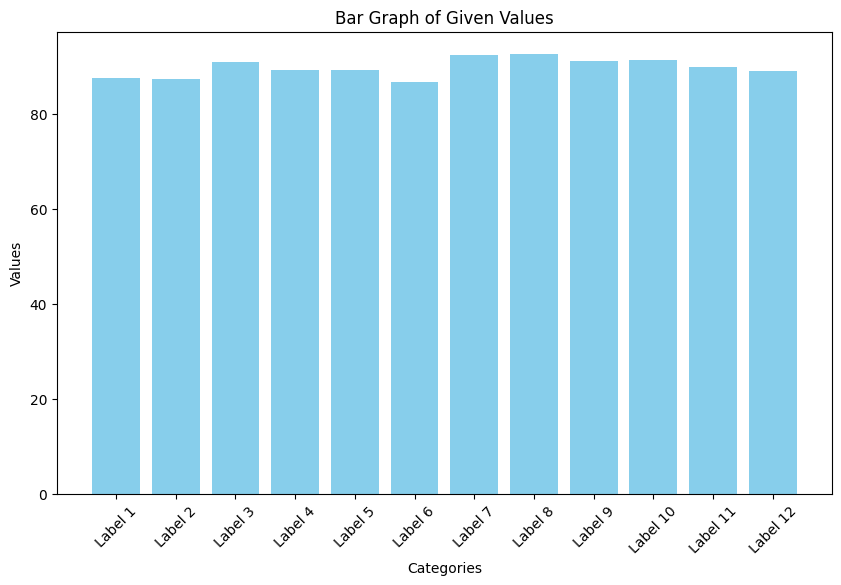

In [ ]:
values = [87.5, 87.3, 90.9, 89.2, 89.2, 86.8, 92.4, 92.7, 91.1, 91.4, 89.9, 89.1]
# June is the lowest

# Generate labels for each bar (e.g., months, categories)
labels = [f"Label {i+1}" for i in range(len(values))]  # Modify labels as needed

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Graph of Given Values")
plt.xticks(rotation=45)  # Rotate labels if needed for readability
plt.show()